<a href="https://colab.research.google.com/github/abhishek150220/Generative-AI-Lab/blob/main/GMM_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name :- Abhishek Kumar
## Scholar No :- 25215011111
## Lab No :- 3
## Topic Name :- GMM Clustering on 2D data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse

# Reproducibility
np.random.seed(42)

# Generate 2D data with 3 clusters
X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=0.8,
    n_features=2
)


In [ ]:
# Fit GMM with 3 components
gmm = GaussianMixture(
    n_components=3,
    covariance_type='full',
    random_state=42
)

gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)


In [ ]:
def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse representing a Gaussian covariance"""
    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    ell = Ellipse(position, width, height, angle=angle, **kwargs)
    ax.add_patch(ell)


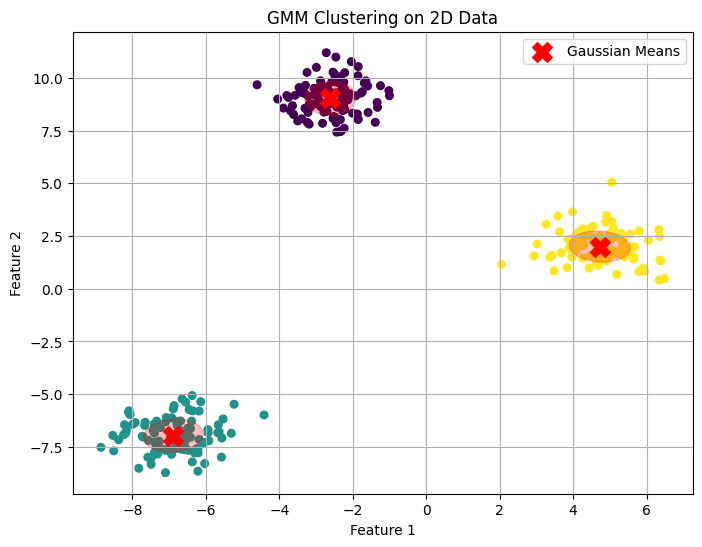

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot colored by predicted labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)

ax = plt.gca()

# Plot Gaussian ellipses
for mean, cov in zip(gmm.means_, gmm.covariances_):
    draw_ellipse(mean, cov, ax, alpha=0.25, color='red')

# Plot cluster centers
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Gaussian Means'
)

plt.title("GMM Clustering on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Converged Gaussian Means:")
means=[]
for i in range(len(gmm.means_)):
    temp=[]
    for j in range(len(gmm.means_[i])):
       temp.append(float(f"{gmm.means_[i][j]:.2f}"))
    means.append(temp)

print(means)
#print(gmm.means_)

print("\nCovariance Matrices:")
for i, cov in enumerate(gmm.covariances_):
    print(f"\nComponent {i+1}:")
    print(cov)


Converged Gaussian Means:
[[-2.61, 9.04], [-6.88, -6.96], [4.73, 2.0]]

Covariance Matrices:

Component 1:
[[0.47916216 0.02795775]
 [0.02795775 0.63177738]]

Component 2:
[[0.65895602 0.06127387]
 [0.06127387 0.62897448]]

Component 3:
[[ 0.68501509 -0.0630035 ]
 [-0.0630035   0.54402201]]
